In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse = pd.read_csv(mouse_drug_data_to_load)
trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

df = pd.merge(trial, mouse, on='Mouse ID', how='left')


# Display the data table for preview

df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
Drug                  1906 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_tumor = df.groupby(['Drug', 'Timepoint']).mean()

# Preview DataFrame

mean_tumor.head()


Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [4]:
mean_tumor.reset_index(inplace=True)

In [5]:
mean_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

error_df = df.groupby(['Drug', 'Timepoint']).sem()

In [7]:
error_df.reset_index(inplace=True)
error_df.head()

,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [8]:
mean_pivot = mean_tumor.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

In [9]:
error_pivot = error_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

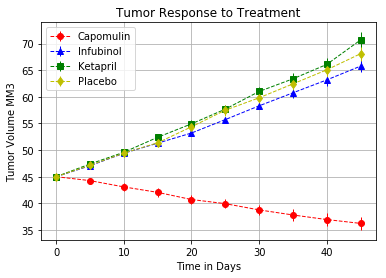

In [10]:
# Generate the Plot (with Error Bars)

plt.errorbar(mean_pivot.index, mean_pivot['Capomulin'], yerr=error_pivot['Capomulin'], color='r', marker='o', linestyle='dashed', linewidth=1.0)

plt.errorbar(mean_pivot.index, mean_pivot['Infubinol'], yerr=error_pivot['Infubinol'], color='b', marker='^', linestyle='dashed', linewidth=1.0)

plt.errorbar(mean_pivot.index, mean_pivot['Ketapril'], yerr=error_pivot['Ketapril'], color='g', marker='s', linestyle='dashed', linewidth=1.0)

plt.errorbar(mean_pivot.index, mean_pivot['Placebo'], yerr=error_pivot['Placebo'], color='y', marker='d', linestyle='dashed', linewidth=1.0)

plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume MM3')
plt.xlabel('Time in Days')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('response.png')
plt.show()


## Metastatic Response to Treatment

In [11]:
# # Store the Mean Met. Site Data Grouped by Drug and Timepoint 

met_mean = mean_tumor.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview DataFrame

met_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_error = error_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview DataFrame

met_error.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


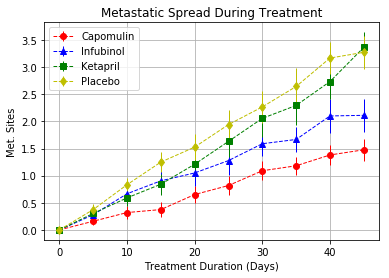

In [13]:
# Generate the Plot (with Error Bars)

plt.errorbar(met_mean.index, met_mean['Capomulin'], yerr=met_error['Capomulin'], color='r', marker='o', linestyle='dashed', linewidth=1.0)

plt.errorbar(met_mean.index, met_mean['Infubinol'], yerr=met_error['Infubinol'], color='b', marker='^', linestyle='dashed', linewidth=1.0)

plt.errorbar(met_mean.index, met_mean['Ketapril'], yerr=met_error['Ketapril'], color='g', marker='s', linestyle='dashed', linewidth=1.0)

plt.errorbar(met_mean.index, met_mean['Placebo'], yerr=met_error['Placebo'], color='y', marker='d', linestyle='dashed', linewidth=1.0)

plt.title('Metastatic Spread During Treatment')
plt.ylabel('Met. Sites')
plt.xlabel('Treatment Duration (Days)')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('spread.png')
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

count_tumor = df.groupby(['Drug', 'Timepoint']).count()

# Preview DataFrame

count_tumor.reset_index(inplace=True)

count_tumor.head()

,Drug,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,25,25,25
1,Capomulin,5,25,25,25
2,Capomulin,10,25,25,25
3,Capomulin,15,24,24,24
4,Capomulin,20,23,23,23


In [15]:
count_tumor.drop(['Mouse ID', 'Tumor Volume (mm3)'], axis=1, inplace=True)

count_tumor.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
count_tumor.rename(columns={'Metastatic Sites': 'Mouse Count'}, inplace=True)

count_tumor.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
survival = count_tumor.pivot(values='Mouse Count', index='Timepoint', columns='Drug')

survival

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


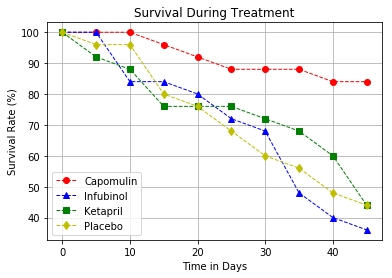

In [18]:
# Generate the Plot (Accounting for percentages)

plt.plot(survival.index, 100*survival['Capomulin']/25, color='r', marker='o', linestyle='dashed', linewidth=1.0)

plt.plot(survival.index, 100*survival['Infubinol']/25, color='b', marker='^', linestyle='dashed', linewidth=1.0)

plt.plot(survival.index, 100*survival['Ketapril']/25, color='g', marker='s', linestyle='dashed', linewidth=1.0)

plt.plot(survival.index, 100*survival['Placebo']/25, color='y', marker='d', linestyle='dashed', linewidth=1.0)

plt.title('Survival During Treatment')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Time in Days')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('survival.png')
plt.show()

In [19]:
df2 = df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]

tumor = df2.groupby(['Drug', 'Timepoint']).mean()

tumor.reset_index(inplace=True)

tumor = tumor.pivot(values='Tumor Volume (mm3)', index='Timepoint', columns='Drug')

tumor = tumor[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

change = (tumor.loc[45, :] - tumor.loc[0, :])/tumor.loc[0, :] * 100

change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

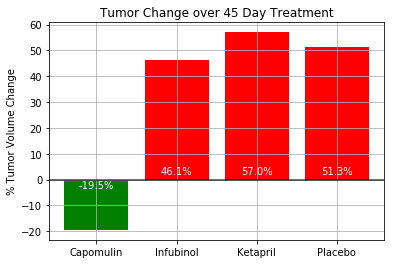

In [20]:
xl = change.index

plt.title('Tumor Change over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.axhline(y=0, color='black', alpha = .75)
plt.xticks(np.arange(len(xl)), xl)
plt.grid(True)
plt.bar(np.arange(4),
       change,
       color = ['r' if change[r] > 0 else 'g' for r in np.arange(len(xl))],
       align = 'center' )

count = 0 

for i in change:
    if i < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(i, 1)) + '%', ha = 'center', color='w')
    count += 1
    
    
plt.savefig('summary.png')

plt.show()

In [21]:
print('The data shows that Capomulin is the only viable candidate for human trials. The others failed miserably.')
print('Ketapril seems to assist cancer growth, as subjects treated with it exibited more tumor growth than the placebo.')
print('Infubinol may have some potential, if alterations to its chemical structure are made.')


The data shows that Capomulin is the only viable candidate for human trials. The others failed miserably.
Ketapril seems to assist cancer growth, as subjects treated with it exibited more tumor growth than the placebo.
Infubinol may have some potential, if alterations to its chemical structure are made.
